# The benchmark testing for KDD Cup Dataset
In this notebook, the general steps of classification procedure is presented. Two methods (Random Foreast and Neural Network) are going to be exploited for the problem of attack identification and detection with the existing dataset - KDDCup'99. This notebook shows the way to program with Tensorflow, SKLearn, NumPy and Matplotlib. 

## Data Engineering

### Environment SetUp
If the enviroment is not ready for the procedure, install all the general toolkits to the enviorment. If the enviornment is ready, skip this step.

In [ ]:
#! pip3 install numpy
#! pip3 install pandas
#! pip3 install -U scikit-learn
#! pip3 install graphviz
#! pip3 install pydotplus

### General SetUp
First of all, we import all the needed libraries to the kernel.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

Second, load the data into the kernel. pd.read_csv() loads the dataset from the csv file and returns a dataframe structure. It could be utilized in the following steps. The required parameters in pd.read_csv() include the path to the dataset, the used coloumns and so on.

In [2]:
data_path = "../../../Dataset/kddcup99.csv"

dataset = pd.read_csv(data_path, sep=',', usecols=range(0, 42))

print("Dataset Shape:", dataset.shape)

Dataset Shape: (494020, 42)


Show the whole dataset.

In [3]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.00,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.00,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.00,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.00,0.00,0.00,0.0,normal
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.00,0.00,0.00,0.0,normal
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.00,0.00,0.00,0.0,normal
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.00,0.00,0.00,0.0,normal
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.00,0.0,normal


### Start the pre-training SetUp
Divide the dataset into two types, one is the collection of features (input_x) and the other is the labels (input_y). There are 41 features and 5 classes. Using Sklearn's train_test_split() to split 20% of data into testing set and the rest is assigned as training set. 

In [4]:
input_x = dataset.iloc[:, 0:41]
input_y = dataset.iloc[:, 41]

train_x, test_x, train_y, test_y = train_test_split(input_x, input_y, test_size=0.20)

Categorize the attack type into two classes: normal and abnormal. Here, we only detect the malicious network traffic. The pre-defined array of new class is ready for the replacement. 

In [5]:
new_class = {'back':'abnormal', 'buffer_overflow':'abnormal', 'ftp_write':'abnormal', 'guess_passwd':'abnormal', 'imap':'abnormal',
            'ipsweep':'abnormal', 'land':'abnormal', 'loadmodule':'abnormal', 'multihop':'abnormal', 'neptune':'abnormal', 'nmap':'abnormal',
            'perl':'abnormal', 'phf':'abnormal', 'pod':'abnormal', 'portsweep':'abnormal', 'rootkit':'abnormal', 'satan':'abnormal',
            'smurf':'abnormal', 'spy':'abnormal', 'teardrop':'abnormal', 'warezclient':'abnormal', 'warezmaster':'abnormal'}
train_y = train_y.replace(new_class)
test_y = test_y.replace(new_class)

### Data Encoding
Transfer the features and label into representative numbers. Here we need the support from SkLearn library.

In [6]:
from sklearn import preprocessing

In [7]:
train_y

476287    abnormal
321943    abnormal
359949    abnormal
485943      normal
53822     abnormal
15329       normal
320782    abnormal
123078    abnormal
85794       normal
432669    abnormal
205485    abnormal
234010    abnormal
142663    abnormal
376245    abnormal
413265    abnormal
172140    abnormal
387042    abnormal
76577       normal
383751    abnormal
183698    abnormal
343573      normal
421439    abnormal
403695    abnormal
306535    abnormal
182669    abnormal
131273    abnormal
101691    abnormal
309870    abnormal
603         normal
214692    abnormal
            ...   
69604     abnormal
471852    abnormal
369410    abnormal
406682    abnormal
394967    abnormal
421369    abnormal
3506        normal
121156    abnormal
71690     abnormal
234162    abnormal
43681     abnormal
457801      normal
361813    abnormal
131230    abnormal
71489     abnormal
345858      normal
250335    abnormal
304345    abnormal
29028       normal
169497    abnormal
6392        normal
434258    ab

Encode the label of training and testing set by using Sklearn.preprocessing.LabelEncoder() in order to make the data all in the representative way.

In [8]:
le_y = preprocessing.LabelEncoder()
le_y.fit(train_y)
n_classes = le_y.classes_.shape[0]
print(n_classes)
train_y = le_y.transform(train_y)
test_y = le_y.transform(test_y)

2


Not only encoding the label but also the features. Need to column by column to transform the value. 

In [9]:
for col in train_x.columns:
    if train_x[col].dtype == type(object):
        le_x = preprocessing.LabelEncoder()
        le_x.fit(train_x[col])
        train_x[col] = le_x.transform(train_x[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
for col in test_x.columns:
    if test_x[col].dtype == type(object):
        le_x = preprocessing.LabelEncoder()
        le_x.fit(test_x[col])
        test_x[col] = le_x.transform(test_x[col])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## 1. Decision Tree Classifier
Start trainning with Decision Tree Classifier.

In [11]:
from sklearn import tree
start_time = time.time()
clf = tree.DecisionTreeClassifier()
dt = clf.fit(train_x, train_y)
rtime_DT = time.time() - start_time
print(rtime_DT)

1.0636489391326904


Draw the decision tree by using "graphviz" and save the graph to png.

In [12]:
import graphviz 
tree_data = tree.export_graphviz(clf, out_file=None)  
graph = pydotplus.graph_from_dot_data(tree_data)  
Image(graph.create_png())
graph.write_png("tree.png") 

True

Evaluate the model's performance with accuracy and the confusion matrixs.

In [13]:
ac_DT = clf.score(test_x, test_y)
print(ac_DT)
prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

0.9996457633294199
[[79373    16]
 [   19 19396]]


In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y, prid)
    roc_auc[i] = auc(fpr[i], tpr[i])

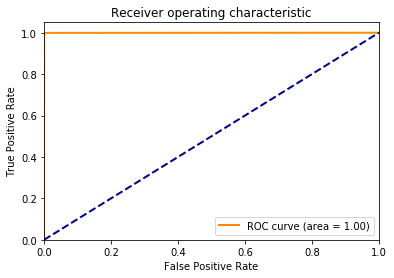

In [15]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 2. Random Forest Classifier
Start trainning with random forest classifier.

In [16]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_x, train_y)
rtime_RF = time.time() - start_time
print(rtime_RF)

15.454015016555786


Evaluate the model's performance with accuracy and the confusion matrixs.

In [17]:
print(clf.feature_importances_)
ac_RF = clf.score(test_x, test_y)
print(ac_RF)

prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

[6.35743077e-03 5.17244699e-02 3.04569561e-02 2.47604788e-02
 7.83775859e-02 1.34435874e-01 3.88112145e-06 2.77106351e-03
 8.71814715e-06 8.81509787e-03 9.13247694e-05 7.19365149e-02
 4.65480782e-03 5.22271919e-05 3.71478941e-06 4.41733603e-05
 4.73655391e-05 2.37312022e-05 1.56111552e-05 0.00000000e+00
 0.00000000e+00 6.23143805e-04 2.35756473e-01 3.03381146e-02
 2.99615455e-03 2.29550818e-03 3.14897794e-03 3.00612956e-03
 3.95878537e-02 2.67107926e-02 1.71126555e-02 8.91532624e-02
 1.99897630e-02 1.30990956e-02 1.41041412e-02 2.94217582e-02
 4.77404528e-02 2.74916241e-03 3.17540335e-03 2.62506099e-03
 1.78506962e-03]
0.9997874579976519
[[79374     3]
 [   18 19409]]


In [18]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y, prid)
    roc_auc[i] = auc(fpr[i], tpr[i])

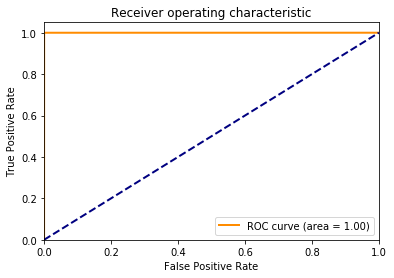

In [19]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 3. Support Vector Machine (SVM) Classifier
Start trainning with SVM classifier

In [20]:
from sklearn.svm import LinearSVC
start_time = time.time()
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(train_x, train_y)
rtime_SVM = time.time() - start_time
print(rtime_SVM)

77.62520289421082


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Evaluate the model's performance with accuracy and the confusion matrixs.

In [21]:
ac_SVM = clf.score(test_x, test_y)
print(ac_SVM)

prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

0.9877130480547346
[[78594   416]
 [  798 18996]]


In [22]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y, prid)
    roc_auc[i] = auc(fpr[i], tpr[i])

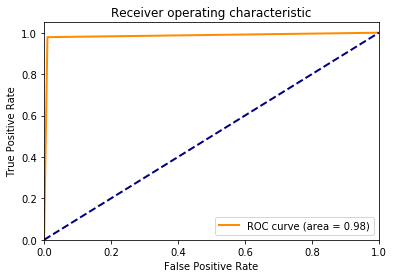

In [23]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 4. KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)
rtime_KNN = time.time() - start_time
print(rtime_KNN)

195.7691400051117


Evaluate the model's performance with accuracy and the confusion matrixs.

In [25]:
ac_KNN = clf.score(test_x, test_y)
print(ac_KNN)

prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

0.9993826160884175
[[79354    23]
 [   38 19389]]


In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y, prid)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 5. Naive Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
clf = GaussianNB()
clf.fit(train_x, train_y)
rtime_NN = time.time() - start_time
print(rtime_NN)

Evaluate the model's performance with accuracy and the confusion matrixs.

In [ ]:
ac_NN = clf.score(test_x, test_y)
print(ac_NN)

prid = clf.predict(test_x)
print(confusion_matrix(prid, test_y))

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y, prid)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Result Comparision

Draw a confusion matrix to see the FP, FN, TP, TN.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prid, test_y))

Plot a figure of accuracy comparision.

In [ ]:
accuracy = [ac_DT*100, ac_RF*100, ac_SVM*100, ac_KNN*100, ac_NN*100]
classifier = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'NN']
plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(classifier)]
low = min(accuracy)
high = max(accuracy)
plt.ylim([math.floor(low-0.2*(high-low)), math.floor(high+0.1*(high-low))])
plt.bar(x_pos, accuracy, color='green')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy (%)")
plt.xticks(x_pos, classifier)
plt.show()

Plot a figure of execution time.

In [ ]:
runtime = [rtime_DT, rtime_RF, rtime_SVM, rtime_KNN, rtime_NN]
x_pos = [i for i, _ in enumerate(classifier)]
plt.bar(x_pos, runtime, color='blue')
plt.xlabel("Classifiers")
plt.ylabel("Time (sec)")
plt.xticks(x_pos, classifier)